# Ratings Prediction Project 


We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don't have a rating. So, we have to build an application which can predict the rating by seeing the review.


We will start our Analysis in importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/UMARFAROOKH70228/INTERNSHIP-18-FLIPROBO/main/Rattings.csv")

In [5]:
df

,Rattings,Review
0,3,PROS1. Its touch screen2. it doesn't have any ...
1,3,Pros1. Boots within 5 seconds (I bet u might h...
2,1,Screen is not upto the mark at this price poin...
3,4,The device is great when it comes to built qua...
4,4,The laptop arrived in a good condition and it ...
...,...,...
45072,3,I bought this product due to very high range s...
45073,3,i got this AC1750 and replaced my TP link rout...
45074,4,I was using Tenda AC 10 router (since 2019) fo...
45075,3,Read all the reviews but was still skeptical t...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45077 entries, 0 to 45076
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  45077 non-null  int64 
 1   Review    45075 non-null  object
dtypes: int64(1), object(1)
memory usage: 704.5+ KB


In [7]:
df['length'] = df['Review'].str.len() #we are calculating length of each and every review before cleansing the data.
df

,Rattings,Review,length
0,3,PROS1. Its touch screen2. it doesn't have any ...,413.0
1,3,Pros1. Boots within 5 seconds (I bet u might h...,775.0
2,1,Screen is not upto the mark at this price poin...,140.0
3,4,The device is great when it comes to built qua...,846.0
4,4,The laptop arrived in a good condition and it ...,196.0
...,...,...,...
45072,3,I bought this product due to very high range s...,1521.0
45073,3,i got this AC1750 and replaced my TP link rout...,736.0
45074,4,I was using Tenda AC 10 router (since 2019) fo...,4068.0
45075,3,Read all the reviews but was still skeptical t...,714.0


In [11]:
df.shape

(45077, 3)

In [12]:
df.dtypes


Rattings      int64
Review       object
length      float64
dtype: object

In [13]:
df.isnull().sum()


Rattings    0
Review      2
length      2
dtype: int64

In [14]:
df.describe()

,Rattings,length
count,45077.000000,45075.000000
mean,3.399073,393.191414
std,1.672427,515.175822
min,1.000000,1.000000
25%,1.000000,101.000000
50%,4.000000,253.000000
75%,5.000000,498.000000
max,5.000000,9051.000000


Data Cleansing.


In [15]:
# Convert all messages to lower case
df['Review'] = df['Review'].str.lower()

In [16]:
# Replace email addresses with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [17]:
# Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [18]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Review'] = df['Review'].str.replace(r'£|\$', 'dollers')

In [19]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [20]:
# Replace numbers with 'numbr'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [21]:
df['Review']= df['Review'].astype(str)

In [22]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [24]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Shiva Labade/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Shiva Labade\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [25]:
lem=WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\Shiva Labade/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Shiva Labade\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [26]:
df['clean_length'] = df.Review.str.len() # checking the length of the words post cleaning.
df.head()


,Rattings,Review,length,clean_length
0,3,prosnumbr. its touch screennumbr. it doesn't h...,413.0,465
1,3,prosnumbr. boots within numbr seconds (i bet u...,775.0,826
2,1,screen is not upto the mark at this price poin...,140.0,140
3,4,the device is great when it comes to built qua...,846.0,848
4,4,the laptop arrived in a good condition and it ...,196.0,196


In [27]:
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 17723103.0
Clean Length 18043968


From above we can see that we have cleaned our reviews.


In [28]:
labels = df.Rattings
Text = df.Review

# Preprocessing

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary = True)
cv.fit(Text)
x = cv.transform(Text)

In [30]:
x

<45077x34307 sparse matrix of type '<class 'numpy.int64'>'
	with 2109197 stored elements in Compressed Sparse Row format>

In [31]:
y = labels

Selecting parameters for training

from sklearn.linear_model import LogisticRegression from sklearn.metrics import accuracy_score, confusion_matrix, classification_report from sklearn.model_selection import train_test_split


accu = 0 for i in range(0,500): x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i) mod = LogisticRegression() mod.fit(x_train,y_train) y_pred = mod.predict(x_test) acc = accuracy_score(y_test,y_pred) if acc> accu: accu= acc best_rstate=i


print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")



In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = 522)

Selecting the Best model for Training


In [34]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes

In [35]:
models = [LogisticRegression(),RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names = ["LogisticRegression", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [36]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 7
....................................................................running LogisticRegression
Accuracy: 0.739787621832525 - (std: 0.003934673987291255)
Precision: 0.7266035211604961 - (std: 0.003687796582905859)
Recall: 0.739787621832525 - (std: 0.003934673987291255)
f1: 0.7288423880828923 - (std: 0.0032314030049043155)


Step 2 of 7
....................................................................running Random Forest
Accuracy: 0.7688937995859039 - (std: 0.00402440168838476)
Precision: 0.8045084075463802 - (std: 0.004557695819117471)
Recall: 0.7688937995859039 - (std: 0.00402440168838476)
f1: 0.745701609682525 - (std: 0.003856839093289845)


Step 3 of 7
....................................................................running Decision Tree
Accuracy: 0.7067467692400973 - (std: 0.006068565366900817)
Precision: 0.6991063766047316 - (std: 0.005472080064213585)
Recall: 0.7067467692400973 - (std: 0.006068565366900817)
f1: 0.7017409952036564 - (std: 0.005462056521552209)


In [37]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
1,Random Forest,0.768894,0.804508,0.768894,0.745702
0,LogisticRegression,0.739788,0.726604,0.739788,0.728842
2,Decision Tree,0.706747,0.699106,0.706747,0.701741
3,Extra Tree,0.671192,0.666077,0.671192,0.667856
5,Gradient Boosting,0.642707,0.654526,0.642707,0.585043
4,Ada Boost,0.590528,0.513124,0.590528,0.518507
6,XGBoost,NaN,NaN,NaN,NaN


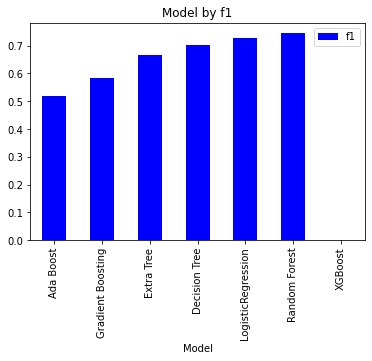

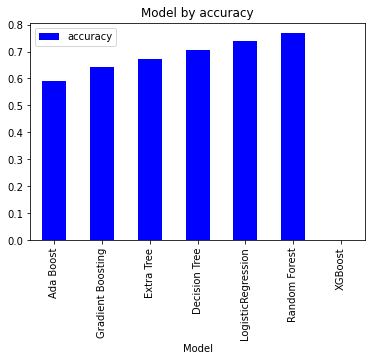

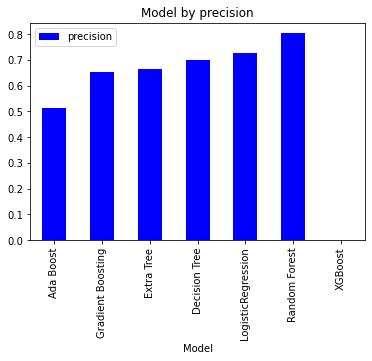

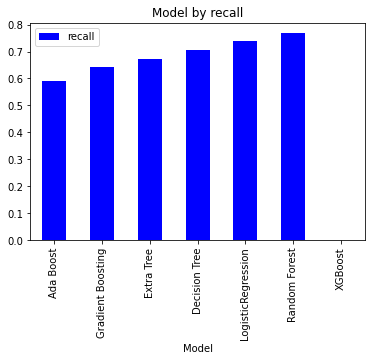

In [38]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = 'blue')
    plt.title(f"Model by {metric}")
    plt.show()


Since Random Forest tops the chart with the following metrics we will Hyper tune Random Forest to get better results.

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [40]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob

array([[0.  , 0.  , 0.01, 0.01, 0.98],
       [0.76, 0.12, 0.03, 0.03, 0.06],
       [0.99, 0.  , 0.  , 0.01, 0.  ],
       ...,
       [0.03, 0.07, 0.17, 0.16, 0.57],
       [0.16, 0.04, 0.06, 0.27, 0.47],
       [0.  , 0.  , 0.  , 0.  , 1.  ]])

In [42]:
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

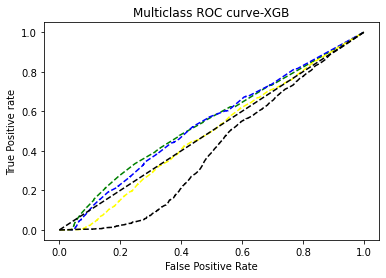

In [43]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [44]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [45]:
preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,1,2,3,4,5
Real,,,,,
1,8241,8,11,28,833
2,753,851,8,28,413
3,617,5,1305,73,1045
4,394,3,20,2235,3028
5,400,4,23,119,13362


In [46]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.79      0.90      0.84      9121
           2       0.98      0.41      0.58      2053
           3       0.95      0.43      0.59      3045
           4       0.90      0.39      0.55      5680
           5       0.72      0.96      0.82     13908

    accuracy                           0.77     33807
   macro avg       0.87      0.62      0.68     33807
weighted avg       0.80      0.77      0.75     33807



Saving the model.


In [47]:
import joblib
joblib.dump(clf_rf,"Rattingprediction.obj")

['Rattingprediction.obj']